# 栗まんじゅう問題

## 【問題】栗まんじゅうが太陽系を覆う日
---
1個の栗まんじゅうにバイバインを振りかけた場合、太陽系が栗まんじゅうで覆われるのは何分後でしょうか。これを計算するプログラムを作成してください。

栗まんじゅうや太陽系の体積を調査した上で仮定して計算してください。栗まんじゅうの隙間や重力などは考えず、問題を単純化して構いません。

ボールにバイバインを振りかけた時、東京ドームが一杯になる時間など他の状況にも適用できるような汎用的なプログラムを作成してください。また、グラフを表示するなど分かりやすいノートブックを作成してください。

*   物体は5分毎に倍になる
*   **栗まんじゅうの体積**を100$cm^3$=<font color="red">**0.0001$m^3$**</font>と仮定する
*   太陽系の体積は約1.2×10^73$m^3$　(計算は下記参照）   
    地球からの太陽までの距離が1.5億km、光の速度は30万km/秒なので、  
    半径 = 30万km × 60秒 × 60分 × 24時 × 365日 × 1.5億 = 1.4 × 10^24$m$  
    体積を求める式$V=4/3πr^3$で計算すると**太陽系の体積は**<font color="red">**1.2×10^73$m^3$**</font>になる。



In [31]:
def clac_time_covered_object(vol_object, vol_covered_with):
    '''ある物が5分ごとに体積が倍に増え続け、目的の物体を覆うのに要する時間（分）を計算する関数。
    Parameteres
    -----------
    vol_object: 覆われる目的の物体の体積（int型）
    vol_covered_with: 目的の物体を覆うモノの体積（int型）

    Returns
    -------
    total_time : int型
        目的の物体を覆うのに要する時間（分）
    '''

    # 所要時間やカウントアップ用の変数を宣言
    total_time = 0
    count = 0
    total_covered_with = vol_covered_with

    # 覆う物体が、目的の物体の体積より大きくなったらWhileを抜ける
    while total_covered_with < vol_object:

        total_time += 5 # カウントアップ
        count += 1
        # 体積の合計　＝　5分ごとの個数　×　1個分の体積
        total_covered_with = (2**count) * vol_covered_with 

    #時間（分）を返す
    return total_time


#########

# 栗まんじゅうで太陽系を覆うのにかかる時間を計算する。
KURI_MANJU = 0.0001
SOLAR = 1.2 * (10**73)

# 関数を使って所要時間を計算する
total_time = clac_time_covered_object(SOLAR, KURI_MANJU)

print("栗まんじゅうは{}分後に太陽系を覆う。".format(total_time))

#########

# 東京ドームの場合：
BALL = 0.0017         # 野球ボールの球の体積は約1700cm^3 = 0.0017m^3と仮定する
TOKYO_DOME = 1240000  # 東京ドームの容積は124万m^3

# 関数を使って所要時間を計算する
total_time = clac_time_covered_object(TOKYO_DOME, BALL)

print("野球ボールは{}分後に東京ドームを覆う。".format(total_time))


栗まんじゅうは1285分後に太陽系を覆う。
野球ボールは150分後に東京ドームを覆う。


## 栗まんじゅう問題向けのプログラム

以下の関数を準備し汎用的に使えるプロがラムを作る

1.   時間と体積データのリストを生成するための関数
2.   リストデータよりグラフを表示する関数







In [32]:

#--------------------------------------------------
# 1. 時間と体積データのリストを生成するための関数
#--------------------------------------------------
def get_volume_and_time_list(vol_object, vol_covered_with):
    '''ある物が5分ごとに体積が倍に増え続け、目的の物体を覆うのに要する時間（分）を計算し、その体積と時間のデータをリストとして返す、関数。
    Parameteres
    -----------
    vol_object: 覆われる目的の物体の体積（int型）
    vol_covered_with: 目的の物体を覆うモノの体積（int型）

    Returns
    -------
    list_time : list
        目的の物体を覆う時間の推移リスト
    list_volume : list
        物体が5分ごとに倍増える体積のリスト
    '''

    # 所要時間やカウントアップ用の変数を宣言
    total_time = 0
    count = 0
    total_covered_with = vol_covered_with

    # リスト変数の定義と初期値を設定
    list_time = [0]
    list_volume = [total_covered_with]

    # 覆う物が、目的の物体の体積より大きくなったらWhileを抜ける
    while total_covered_with < vol_object:

        total_time += 5 # カウントアップ
        count += 1
        # 体積の合計　＝　5分ごとの個数　×　1個分の体積
        total_covered_with = (2**count) * vol_covered_with

        # 時間と体積データをリストに格納 
        list_time.append(total_time)
        list_volume.append(total_covered_with)

    # 時間と体積リストを返す
    return list_time, list_volume


######

#--------------------------------------------------
# 2. リストデータよりグラフを表示する関数
#--------------------------------------------------
def show_graph(time_data, volume_data, str_title):
    '''引数のデータからグラフを表示する関数
    Parameteres
    -----------
    time_data:    時間データ（list型）
    volume_data:  体積データ（int型）
    str_title：   グラフのタイトル　(string型)

    Returns
    -------
    None
    ''' 
    import matplotlib.pyplot as plt
    %matplotlib inline

    #折れ線グラフを表示
    plt.title(str_title,  fontsize=15)  # ラベルのフォントサイズを設定
    plt.xlabel("Time(min)", fontsize=15)  # ラベルのフォントサイズを設定
    plt.ylabel("Volumes", fontsize=15)    # ラベルのフォントサイズを設定
    plt.tick_params(labelsize=15) # 軸の値に関する設定を行う
    plt.plot(time_data, volume_data, linewidth=3) 
    plt.grid(linestyle='dotted')  #　グリッド表示
    plt.show()




## 上記の関数を使って、栗まんじゅうと東京ドーム問題の実行する

栗まんじゅうは1285分後に太陽系を覆う。


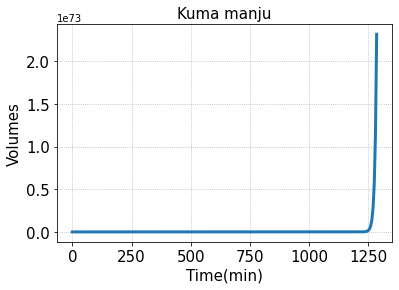

野球ボールは150分後に東京ドームを覆う。


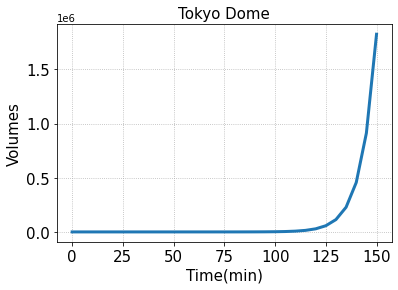

In [33]:
## 栗まんじゅう

KURI_MANJU = 0.0001     # 栗まんじゅうの体積
SOLAR = 1.2 * (10**73)  # 太陽系の体積

# 時間を出力
list_time, list_volume = get_volume_and_time_list(SOLAR, KURI_MANJU)
print("栗まんじゅうは{}分後に太陽系を覆う。".format(list_time[-1]))

# グラフを表示
show_graph(list_time, list_volume, "Kuma manju")

###################################

## 東京ドーム
BALL = 0.0017         # 野球ボールの球の体積は約1700cm^3 = 0.0017m^3と仮定する
TOKYO_DOME = 1240000  # 東京ドームの容積は124万m^3

# 時間を出力
list_time, list_volume = get_volume_and_time_list(TOKYO_DOME, BALL)
print("野球ボールは{}分後に東京ドームを覆う。".format(list_time[-1]))

# グラフを表示
show_graph(list_time, list_volume, "Tokyo Dome")
